## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

## Explanation
### Dataset
Several channels measuring time, internal cloc, address (FPGA(01)+TOC_CHANNEL), measurements: tdc -> every tick is a (25/30)ns ad 30 BX_counter bumps up. When BX_counter goes to somehting it bumps up Orbit_CNT...

See theory lesson for details

---

In [2]:
import pandas as pd
import numpy.random
import random
import matplotlib.pyplot as plt

In [3]:
# 1
raw = pd.read_csv('./data/data_000637.txt')

df1 = raw.sample(random.randrange(10001, raw.shape[0]), axis=0)
df1 = df1.sort_values(by=['ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS'])
display(df1)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
8,1,0,62,3869200167,2774,21
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310719,1,0,61,3869211171,762,18
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0


In [4]:
# 2 
print('BX_COUNTER MAX', raw['BX_COUNTER'].max(), '\n')
print(raw.min())


BX_COUNTER MAX 3563 

HEAD                    1
FPGA                    0
TDC_CHANNEL             1
ORBIT_CNT      3869200167
BX_COUNTER              0
TDC_MEAS                0
dtype: int64


In [5]:
# 3
display(raw)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [18]:
ini = raw.head(1)
fin = raw.tail(1)

fini = ((fin['ORBIT_CNT']*3564/30 + fin['BX_COUNTER'] + fin['TDC_MEAS']/30)*25).iloc[0]
inif = ((ini['ORBIT_CNT']*3564/30 + ini['BX_COUNTER'] + ini['TDC_MEAS']/30)*25).iloc[0]

print(fini - inif)


32641573.333984375


In [7]:
df1['ABS_TIME']=(df1['ORBIT_CNT']*3564/30 + df1['BX_COUNTER'] + df1['TDC_MEAS']/30)*25

In [8]:
display(df1)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,1.149152e+13
2,1,0,63,3869200167,2553,28,1.149152e+13
3,1,0,64,3869200167,2558,19,1.149152e+13
4,1,0,64,3869200167,2760,25,1.149152e+13
8,1,0,62,3869200167,2774,21,1.149152e+13
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,1.149156e+13
1310719,1,0,61,3869211171,762,18,1.149156e+13
1310716,1,1,4,3869211171,763,11,1.149156e+13
1310717,1,0,64,3869211171,764,0,1.149156e+13


In [9]:
rng = numpy.random.default_rng()

df1 = df1.assign(HEAD=lambda x: rng.integers(2, size=len(df1['HEAD'])))

In [10]:
display(df1)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,0,0,123,3869200167,2374,26,1.149152e+13
2,0,0,63,3869200167,2553,28,1.149152e+13
3,0,0,64,3869200167,2558,19,1.149152e+13
4,1,0,64,3869200167,2760,25,1.149152e+13
8,1,0,62,3869200167,2774,21,1.149152e+13
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,1.149156e+13
1310719,1,0,61,3869211171,762,18,1.149156e+13
1310716,0,1,4,3869211171,763,11,1.149156e+13
1310717,1,0,64,3869211171,764,0,1.149156e+13


In [11]:
heads = df1[df1['HEAD']==1]

In [12]:
display(heads)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
4,1,0,64,3869200167,2760,25,1.149152e+13
8,1,0,62,3869200167,2774,21,1.149152e+13
7,1,0,139,3869200167,2776,0,1.149152e+13
10,1,1,7,3869200167,2785,4,1.149152e+13
11,1,0,64,3869200167,2786,19,1.149152e+13
...,...,...,...,...,...,...,...
1310714,1,0,60,3869211171,762,2,1.149156e+13
1310715,1,0,62,3869211171,762,14,1.149156e+13
1310719,1,0,61,3869211171,762,18,1.149156e+13
1310717,1,0,64,3869211171,764,0,1.149156e+13


In [20]:
FP1 = df1[df1['FPGA']==1]
FP0 = df1[df1['FPGA']==0]

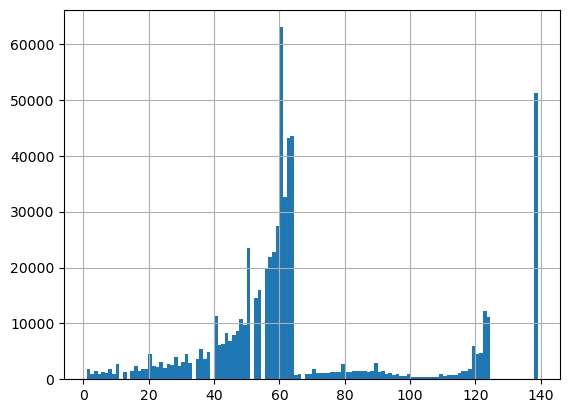

In [14]:
FP0['TDC_CHANNEL'].hist(bins=FP0['TDC_CHANNEL'].nunique())
plt.show()

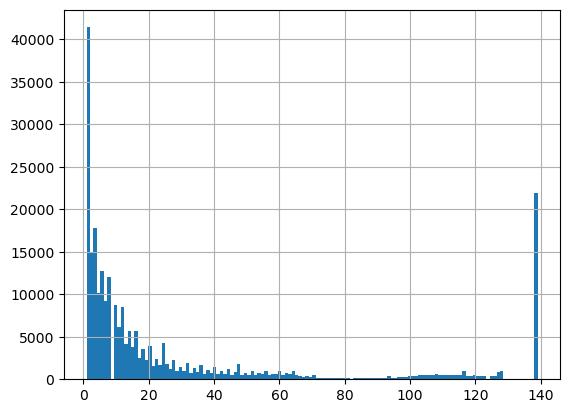

In [15]:
FP1['TDC_CHANNEL'].hist(bins=FP1['TDC_CHANNEL'].nunique())
plt.show()

In [36]:
what = raw.groupby(['FPGA','TDC_CHANNEL'])

(0, 1)
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
1669        1     0            1  3869200184        1280        12
6622        1     0            1  3869200233         996        29
6977        1     0            1  3869200237         636        29
9812        1     0            1  3869200265        1554         2
10023       1     0            1  3869200267        1797        23
...       ...   ...          ...         ...         ...       ...
1303537     1     0            1  3869211123        3556        15
1304119     1     0            1  3869211128        2522         0
1304271     1     0            1  3869211130        1276        20
1308274     1     0            1  3869211156        3433        22
1309879     1     0            1  3869211166          52        22

[1215 rows x 6 columns]
(0, 2)
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
927         1     0            2  3869200176        3075        22
3878        1     0    

In [37]:
print(raw['TDC_CHANNEL'].value_counts())
print(raw.value_counts('TDC_CHANNEL'))

TDC_CHANNEL
139    108059
64      66020
63      64642
61      49479
62      49349
        ...  
126       606
130        71
138        70
137        68
129        37
Name: count, Length: 133, dtype: int64
TDC_CHANNEL
139    108059
64      66020
63      64642
61      49479
62      49349
        ...  
126       606
130        71
138        70
137        68
129        37
Name: count, Length: 133, dtype: int64
